## 0. Inporting Packages

In [1]:

path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path
#import LSDpy.lsdpy
#import specpolFlow as pol


import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import itertools

import pyRaven as rav
import scipy

In [2]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

## 1. Single Star

In [3]:
fname='{}05-RavenSetup/normalized_maskdepth0.02_tellClean/{}.h5'.format(path,'hd35411')
DataPacket=rav.data.read_packet(fname)


In [4]:
## Defines star 1 parameters
genparam = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':100,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':np.log(1.3),          # the line strength parameter
    'Bpole':1.0e1,         # the dipolar field strength
    'incl':np.pi/4,      # the inclination of the rotational axis to the line of sight
    'beta':np.pi/4,      # the obliquity of the magnetic axis to the rotational axis
    'phase':0.0,     # the rotational phase
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    }
unnoparam = {
    'down':[0.5,0, 0.5],   # the s, j, l of the lower level
    'up':[0.5, 1, 0.5]    # the s, j, l of the upper level
    }
weakparam = {
    'geff':1.0,
    }
param1={'general' : genparam,
    'unno' : unnoparam,
    'weak' : weakparam}
param1['general'].update({'res': 65000.})
param1['general'].update({'vmac': 10.})

## defines star 2 parameters
genparam2 = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':50,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':np.log(1.3),          # the line strength parameter
    'Bpole':1.0e1,         # the dipolar field strength
    'incl':np.pi/4,      # the inclination of the rotational axis to the line of sight
    'beta':np.pi/4,      # the obliquity of the magnetic axis to the rotational axis
    'phase':0.0,     # the rotational phase
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    }
unnoparam2 = {
    'down':[0.5,0, 0.5],   # the s, j, l of the lower level
    'up':[0.5, 1, 0.5]    # the s, j, l of the upper level
    }
weakparam2 = {
    'geff':1.0,
    }
param2={'general' : genparam2,
    'unno' : unnoparam2,
    'weak' : weakparam2}
param2['general'].update({'res': 65000.})
param2['general'].update({'vmac': 10.})

In [5]:

x1=DataPacket.scaled.lsds[0].vel
y1=DataPacket.scaled.lsds[0].specI
x2=DataPacket.scaled.lsds[1].vel
y2=DataPacket.scaled.lsds[1].specI
x3=DataPacket.scaled.lsds[2].vel
y3=DataPacket.scaled.lsds[2].specI
y1err=DataPacket.scaled.lsds[0].specSigI
y2err=DataPacket.scaled.lsds[1].specSigI
y3err=DataPacket.scaled.lsds[2].specSigI

In [6]:
guess=np.array([0.4,0.51,60,30,30,30,-40,90,-40,90,-40,90])
pout,pcov,binary_models,star1_models,star2_models=rav.fitparams.binary_fitting([x1,x2,x3],[y1,y2,y3],guess,param1,param2)

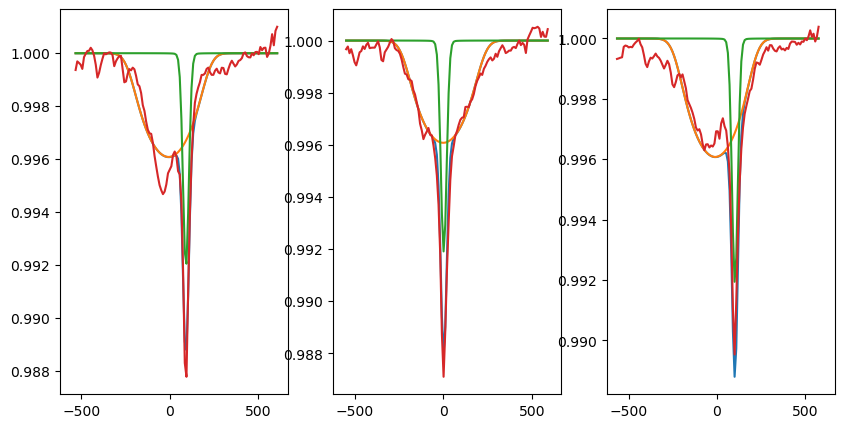

In [21]:
kappa1=pout[0]
kappa2=pout[1]
vsini1=pout[2]
vsini2=pout[3]
vmac1=pout[4]
vmac2=pout[5]
fig, ax = plt.subplots(1,3,sharex=True,figsize=(10,5))

ax[0].plot(x1,binary_models[0][0])
ax[0].plot(x1,star1_models[0][0])
ax[0].plot(x1,star2_models[0][0])
ax[0].plot(x1,y1)

ax[1].plot(x2,binary_models[1][0])
ax[1].plot(x2,star1_models[1][0])
ax[1].plot(x2,star2_models[1][0])
ax[1].plot(x2,y2)

ax[2].plot(x3,binary_models[2][0])
ax[2].plot(x3,star1_models[2][0])
ax[2].plot(x3,star2_models[2][0])
ax[2].plot(x3,y3)

## 2. Loop over all binaries - UPDATE

[   0.4223026     0.39202669  276.87964627  215.72544102    2.46779868
   12.99602175  134.79080084 -102.33956847]


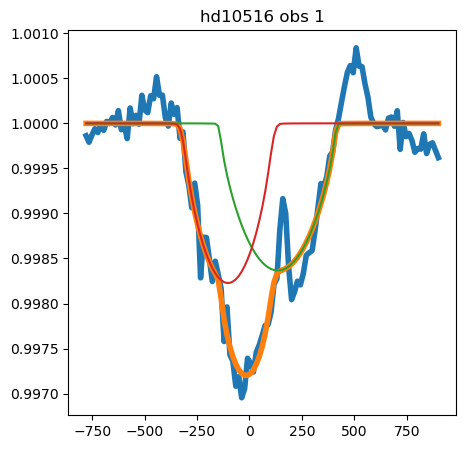

[  0.58308306   0.31434435 224.52037414   5.26037998  40.
  14.31583753  -7.28913311  90.66132427  -0.95383727   1.79494732
  -9.68788786 101.5958658 ]


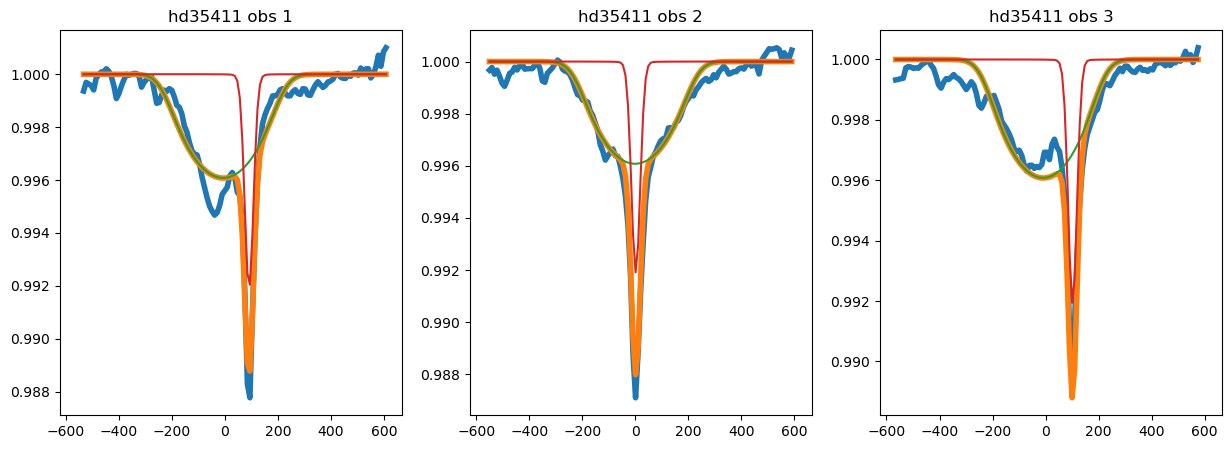

[7.34680361e-01 2.08874941e-01 2.74030769e+02 5.16052332e+00
 4.00000000e+01 2.03588298e+01 1.16167623e+01 5.48349672e-02
 1.97904819e+01 2.85806310e+01]


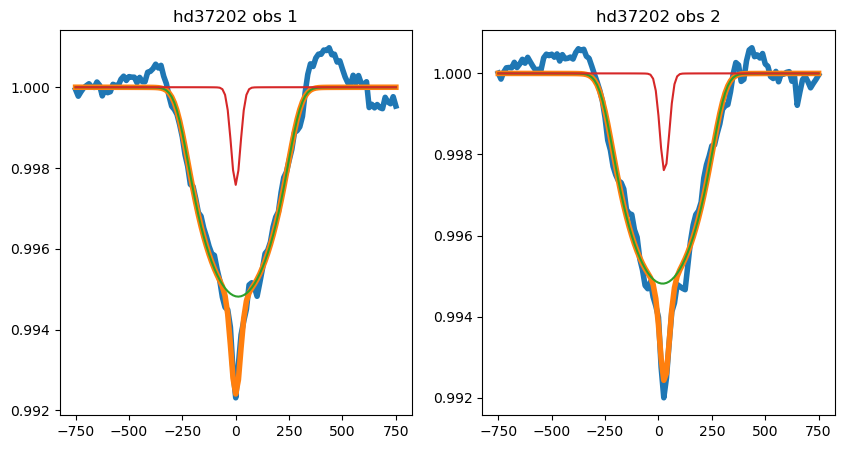

In [22]:
binaries = ['hd10516','hd35411','hd37202']

for i in range(3):
    fname='{}05-RavenSetup/normalized_maskdepth0.02_tellClean/{}.h5'.format(path,binaries[i])
    DataPacket=datapacket=rav.data.read_packet(fname)
    nobs=DataPacket.nobs

    guess=np.array([0.4,0.51,60,30,30,30])
    xs=[]
    ys=[]
    for n in range(nobs):
        guess=np.append(guess, -10)
        guess=np.append(guess, 10)
        xs.append(DataPacket.scaled.lsds[n].vel)
        ys.append(DataPacket.scaled.lsds[n].specI)
    pout,_=binary_fitting(xs,ys,guess)
    print(pout)

    kappa1=pout[0]
    kappa2=pout[1]
    vsini1=pout[2]
    vsini2=pout[3]
    vmac1=pout[4]
    vmac2=pout[5]
    fig, ax = plt.subplots(1,nobs,sharex=True,figsize=(5*nobs,5))

    if nobs>1:
        for n in range(nobs):
            ax[n].plot(xs[n],ys[n],linewidth=4)
            ax[n].plot(xs[n],binary(xs[n],kappa1,kappa2,vsini1,vsini2,vmac1,vmac2,pout[6+2*n],pout[7+2*n]),linewidth=4)
            ax[n].plot(xs[n],star1(xs[n],kappa1,vsini1,vmac1,pout[6+2*n]))
            ax[n].plot(xs[n],star2(xs[n],kappa2,vsini2,vmac2,pout[7+2*n]))
    
            ax[n].set_title('{} obs {}'.format(binaries[i],n+1))
    if nobs==1:
        n==0
        ax.plot(xs[n],ys[n],linewidth=4)
        ax.plot(xs[n],binary(xs[n],kappa1,kappa2,vsini1,vsini2,vmac1,vmac2,pout[6+2*n],pout[7+2*n]),linewidth=4)
        ax.plot(xs[n],star1(xs[n],kappa1,vsini1,vmac1,pout[6+2*n]))
        ax.plot(xs[n],star2(xs[n],kappa2,vsini2,vmac2,pout[7+2*n]))
        
        ax.set_title('{} obs {}'.format(binaries[i],n+1))
    plt.show()